### 先物指数や株価指数等を取得して描画し、相関を確認
####  https://note.com/scilabcafe/n/n91f21c5aa65b

In [ ]:
# !jupyter nbconvert --to script index_glance.ipynb

[NbConvertApp] Converting notebook index_glance.ipynb to script
[NbConvertApp] Writing 6721 bytes to index_glance.py


In [ ]:
import pandas_datareader.data as web
import yfinance as yf
import datetime
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import gridspec
import japanize_matplotlib
%matplotlib inline

import plotly.graph_objects as go # グラフ表示関連ライブラリ
import plotly.io as pio # 入出力関連ライブラリ
# pio.renderers.default = 'iframe'
from plotly import offline

from plotly.subplots import make_subplots  # subplot

In [ ]:
# 確認対象銘柄

# stooqより取得
codelists_stooq = [
    '^SPX', # S&P 500
]

# yahoofinanceより取得
codelists_yf = [
    'HG=F', # copper(銅)
    'GC=F', # Gold(金)
    'CL=F', # Oil(原油)
    'SOXX', # 半導体
    '^DJT', # Transportation Average Index(DJTA)
    '^RUT', # Russel 2000
    '^VIX', # VIX index
    '^SKEW', # SKEW index
    ## CBOE SKEW Index（CBOEスキュー指数）市場参加者の長期的なリスクに関する見通しを提供する指数。
    ## 高いスキュー値は、市場の大きな下落のリスクが増加していることを示唆
    'HYG', # ジャンクボンド
    '^TNX', # アメリカ10年国債
    'DX=F', # ドルインデックス
    'BTC-USD', # BTC
    'ETH-USD', # ETH

]

In [ ]:
# 開始・終了日の設定
start = datetime.date.today() - datetime.timedelta(days=180)
end = datetime.date.today()

# データ取得(stooq)
_df_stooq = web.DataReader(codelists_stooq, 'stooq', start, end)['Close']

# 日付を昇順に並び替える
_df_stooq.sort_index(inplace=True)

# データ取得(yahoo finance)
_df_yahoo = yf.download(codelists_yf, start, end)['Adj Close']

# _df_stooqと_df_yahooを結合する
df = pd.DataFrame()
df = pd.merge(_df_stooq, _df_yahoo, on='Date', how='left')

[*********************100%%**********************]  13 of 13 completed


In [ ]:
# カラム名変更
df.rename(columns={

    '^SPX':'S&P 500',
    'BTC-USD':'BTC',
    'CL=F':'原油',
    'DX=F':'ドル',
    'ETH-USD':'ETH',
    'GC=F':'金',
    'HG=F':'銅',
    'HYG':'ジャンクボンド',
    'SOXX':'半導体',
    '^DJT':'Dow30',
    '^RUT':'Rs2000',
    '^SKEW':'SKEW',
    '^TNX':'金利10Y',
    '^VIX':'VIX',

},inplace=True)

df.head(3)

,S&P 500,BTC,原油,ドル,ETH,金,銅,ジャンクボンド,半導体,Dow30,Rs2000,SKEW,金利10Y,VIX
Date,,,,,,,,,,,,,,
2023-12-04,4569.78,41980.097656,73.040001,103.647003,2243.215820,2024.099976,3.8205,73.860115,168.916794,15525.610352,1882.020020,144.539993,4.288,13.08
2023-12-05,4567.18,44080.648438,72.320000,103.995003,2293.841797,2018.500000,3.7725,73.928307,167.956802,15289.690430,1856.040039,144.539993,4.171,12.85
2023-12-06,4549.34,43746.445312,69.379997,104.108002,2231.661377,2030.500000,3.7165,73.938065,166.920685,15230.030273,1852.050049,144.539993,4.121,12.97


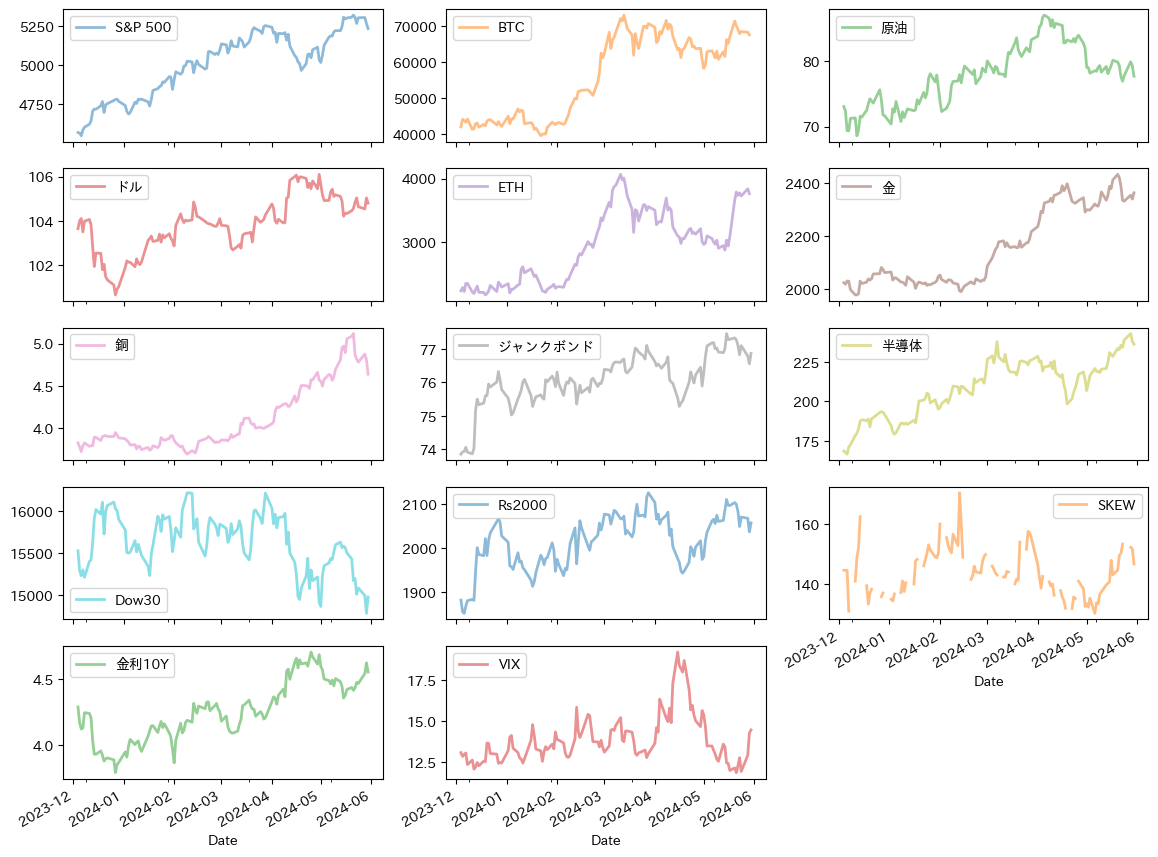

In [ ]:
##取得したデータを一覧表示するおまけ機能###
df.plot(figsize=(14, 16), linewidth=2, alpha=0.5, subplots=True, layout=(7,3), grid=False)
plt.show()

In [ ]:
import plotly.graph_objects as go # グラフ表示関連ライブラリ
import plotly.io as pio # 入出力関連ライブラリ
# pio.renderers.default = 'iframe'
from plotly import offline

from plotly.subplots import make_subplots  # subplot


# グラフの実体となる trace オブジェクトを生成
trace_1 = go.Scatter(x=df.index, y=df['S&P 500'], mode='lines', line=dict(color='red', width=2), name='SP500')
trace_2 = go.Scatter(x=df.index, y=df['ドル'], mode='lines', line=dict(color='red', width=2), name='ドル')
trace_3 = go.Scatter(x=df.index, y=df['BTC'], mode='lines', line=dict(color='red', width=2), name='BTC')
trace_4 = go.Scatter(x=df.index, y=df['ETH'], mode='lines', line=dict(color='red', width=2), name='ETH')
trace_5 = go.Scatter(x=df.index, y=df['ジャンクボンド'], mode='lines', line=dict(color='red', width=2), name='ジャンクボンド')
trace_6 = go.Scatter(x=df.index, y=df['金'], mode='lines', line=dict(color='red', width=2), name='金')
trace_7 = go.Scatter(x=df.index, y=df['銅'], mode='lines', line=dict(color='red', width=2), name='銅')
trace_8 = go.Scatter(x=df.index, y=df['原油'], mode='lines', line=dict(color='red', width=2), name='原油')
trace_9 = go.Scatter(x=df.index, y=df['半導体'], mode='lines', line=dict(color='red', width=2), name='半導体')
trace_10 = go.Scatter(x=df.index, y=df['Rs2000'], mode='lines', line=dict(color='red', width=2), name='Rs2000')
trace_11 = go.Scatter(x=df.index, y=df['SKEW'], mode='lines', line=dict(color='red', width=2), name='SKEW')
trace_12 = go.Scatter(x=df.index, y=df['VIX'], mode='lines', line=dict(color='red', width=2), name='VIX')
trace_13 = go.Scatter(x=df.index, y=df['Dow30'], mode='lines', line=dict(color='red', width=2), name='Dow30')
trace_14 = go.Scatter(x=df.index, y=df['金利10Y'], mode='lines', line=dict(color='red', width=2), name='金利10Y')


rows=4
cols=4

subplots_fig = make_subplots(
    rows=rows,
    cols=cols,
    start_cell='top-left',
    subplot_titles=[
        'SP500',
        'ドル',
        'BTC',
        'ETH',
        'ジャンクボンド',
        '金',
        '銅',
        '原油',
        '半導体',
        'Rs2000',
        'SKEW',
        'VIX',
        'Transportation Average Index',
        '米国10年国債',
    ],
    horizontal_spacing=0.08,
    vertical_spacing=0.12,
)


# 描画領域である figure オブジェクトの作成
subplots_fig.add_trace(trace_1, row=1, col=1)
subplots_fig.add_trace(trace_2, row=1, col=2)
subplots_fig.add_trace(trace_3, row=1, col=3)
subplots_fig.add_trace(trace_4, row=1, col=4)

subplots_fig.add_trace(trace_5, row=2, col=1)
subplots_fig.add_trace(trace_6, row=2, col=2)
subplots_fig.add_trace(trace_7, row=2, col=3)
subplots_fig.add_trace(trace_8, row=2, col=4)

subplots_fig.add_trace(trace_9, row=3, col=1)
subplots_fig.add_trace(trace_10, row=3, col=2)
subplots_fig.add_trace(trace_11, row=3, col=3)
subplots_fig.add_trace(trace_12, row=3, col=4)

subplots_fig.add_trace(trace_13, row=4, col=1)
subplots_fig.add_trace(trace_14, row=4, col=2)

# レイアウトの更新
subplots_fig.update_layout(

    # 凡例は表示
    showlegend=False,

    # 幅と高さの設定
    width=1200,height=900,

    title='米国の主要インデックスと各種指数',
    plot_bgcolor='white', # 背景色を白に設定

),


for row in range(1,rows+1):
    for col in range(1, cols+1):

        # linecolorを設定して、ラインをミラーリング（mirror=True）して枠にする
        subplots_fig.update_xaxes(linecolor='black', linewidth=1, mirror=True, row=row, col=col)
        subplots_fig.update_yaxes(linecolor='black', linewidth=1, mirror=True, row=row, col=col)

        # ticks='inside'：目盛り内側, tickcolor：目盛りの色, tickwidth：目盛りの幅、ticklen：目盛りの長さ
        subplots_fig.update_xaxes(ticks='inside', tickcolor='black', tickwidth=1, ticklen=5, row=row, col=col)
        subplots_fig.update_yaxes(ticks='inside', tickcolor='black', tickwidth=1, ticklen=5, row=row, col=col)

        # gridcolor：グリッドの色, gridwidth：グリッドの幅、griddash='dot'：破線
        subplots_fig.update_xaxes(gridcolor='lightgrey', gridwidth=1, griddash='dot', row=row, col=col)
        subplots_fig.update_yaxes(gridcolor='lightgrey', gridwidth=1, griddash='dot', row=row, col=col)

        # 軸の文字サイズ変更
        subplots_fig.update_xaxes(tickfont=dict(size=12, color='grey'), row=row, col=col)
        subplots_fig.update_yaxes(tickfont=dict(size=14, color='grey'), row=row, col=col)

# show()メソッドでグラフを描画
# subplots_fig.show()

# ファイルサイズを小さくしたい場合にはTrueを選べば良い
offline.plot(subplots_fig, filename = 'basic-line', auto_open = True)

/home/bayes/.local/lib/python3.10/site-packages/plotly/offline/offline.py:557: UserWarning:

Your filename `basic-line` didn't end with .html. Adding .html to the end of your file.



'basic-line.html'

既存のブラウザ セッションで開いています。


In [ ]:
df.corr() # 相関関係

,S&P 500,BTC,原油,ドル,ETH,金,銅,ジャンクボンド,半導体,Dow30,Rs2000,SKEW,金利10Y,VIX
S&P 500,1.000000,0.873592,0.771237,0.552801,0.836195,0.732153,0.655945,0.867436,0.969369,-0.056878,0.807865,0.069427,0.625024,0.161050
BTC,0.873592,1.000000,0.818770,0.552377,0.946759,0.798004,0.635405,0.678289,0.856361,-0.214351,0.687026,-0.139082,0.673508,0.332784
原油,0.771237,0.818770,1.000000,0.622851,0.719262,0.720098,0.501394,0.550135,0.730914,-0.088393,0.540304,-0.129166,0.716281,0.597779
ドル,0.552801,0.552377,0.622851,1.000000,0.422064,0.673400,0.607032,0.216065,0.478740,-0.528952,0.062596,-0.098723,0.924657,0.508669
ETH,0.836195,0.946759,0.719262,0.422064,1.000000,0.634465,0.480479,0.646184,0.864381,-0.166515,0.676388,-0.016317,0.548552,0.264122
金,0.732153,0.798004,0.720098,0.673400,0.634465,1.000000,0.913081,0.604245,0.683555,-0.470217,0.483683,-0.355724,0.790549,0.378413
銅,0.655945,0.635405,0.501394,0.607032,0.480479,0.913081,1.000000,0.596949,0.600135,-0.551638,0.440039,-0.297102,0.732031,0.133514
ジャンクボンド,0.867436,0.678289,0.550135,0.216065,0.646184,0.604245,0.596949,1.000000,0.836090,0.091361,0.879142,0.010002,0.311648,-0.074927
半導体,0.969369,0.856361,0.730914,0.478740,0.864381,0.683555,0.600135,0.836090,1.000000,-0.043217,0.818363,0.110716,0.564301,0.156751
Dow30,-0.056878,-0.214351,-0.088393,-0.528952,-0.166515,-0.470217,-0.551638,0.091361,-0.043217,1.000000,0.308118,0.356903,-0.592942,-0.321644


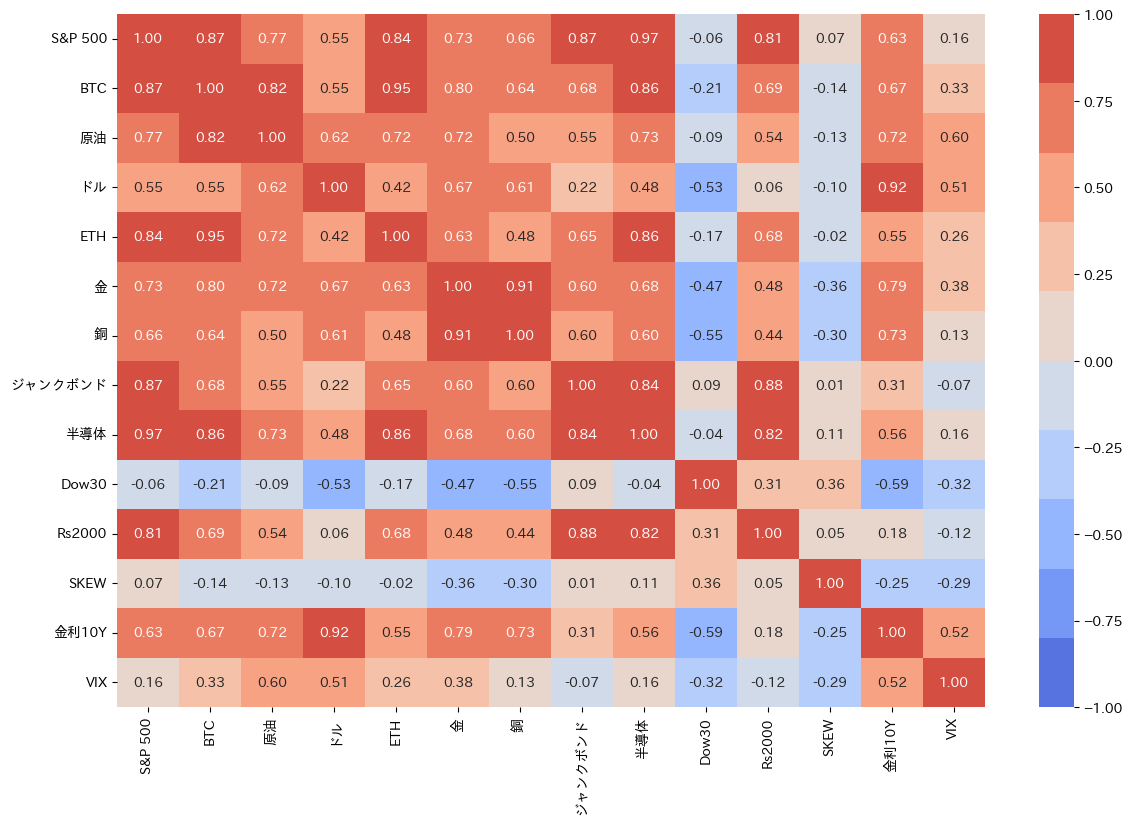

In [ ]:
import seaborn as sns

plt.figure(figsize=(14, 9))
cor = df.corr()
sns.heatmap(cor, cmap= sns.color_palette('coolwarm', 10), annot=True,fmt='.2f', vmin = -1, vmax = 1)
plt.show()
